In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
header = [
        "id",
        "cycle",
        "setting1",
        "setting2",
        "setting3",
        "s1",
        "s2",
        "s3",
        "s4",
        "s5",
        "s6",
        "s7",
        "s8",
        "s9",
        "s10",
        "s11",
        "s12",
        "s13",
        "s14",
        "s15",
        "s16",
        "s17",
        "s18",
        "s19",
        "s20",
        "s21",
        ]

In [3]:
def read_data(filename):

    train_df = pd.read_csv(f"./dataset/{filename}/train_{filename}.txt", sep=" ", header=None)
    train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
    train_df.columns = header

    # train_df = train_df.sort_values(["id", "cycle"])

    test_df = pd.read_csv(f"./dataset/{filename}/test_{filename}.txt", sep=" ", header=None)
    test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
    test_df.columns =header
    
    
    truth_df = pd.read_csv(f"./dataset/{filename}/RUL_{filename}.txt", sep=" ", header=None)
    truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
    return train_df, test_df, truth_df

In [4]:
filename= "FD001"

In [5]:
train_df, test_df, truth_df = read_data(filename)

In [6]:
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
test_df.columns[5:]

Index(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')

In [8]:
def plotSensorDataOfId(data, mcId):
    plt.figure(figsize=(30, 20))
    for i,header in enumerate(data.columns[5:]):
        sensor = 'sensor'+str(i+1)
        plt.subplot(10, 3, i+1).set_title(sensor)
        ssdata = data[data['id']==mcId]
        
        plt.plot(ssdata['cycle'], ssdata[header])
    plt.tight_layout()

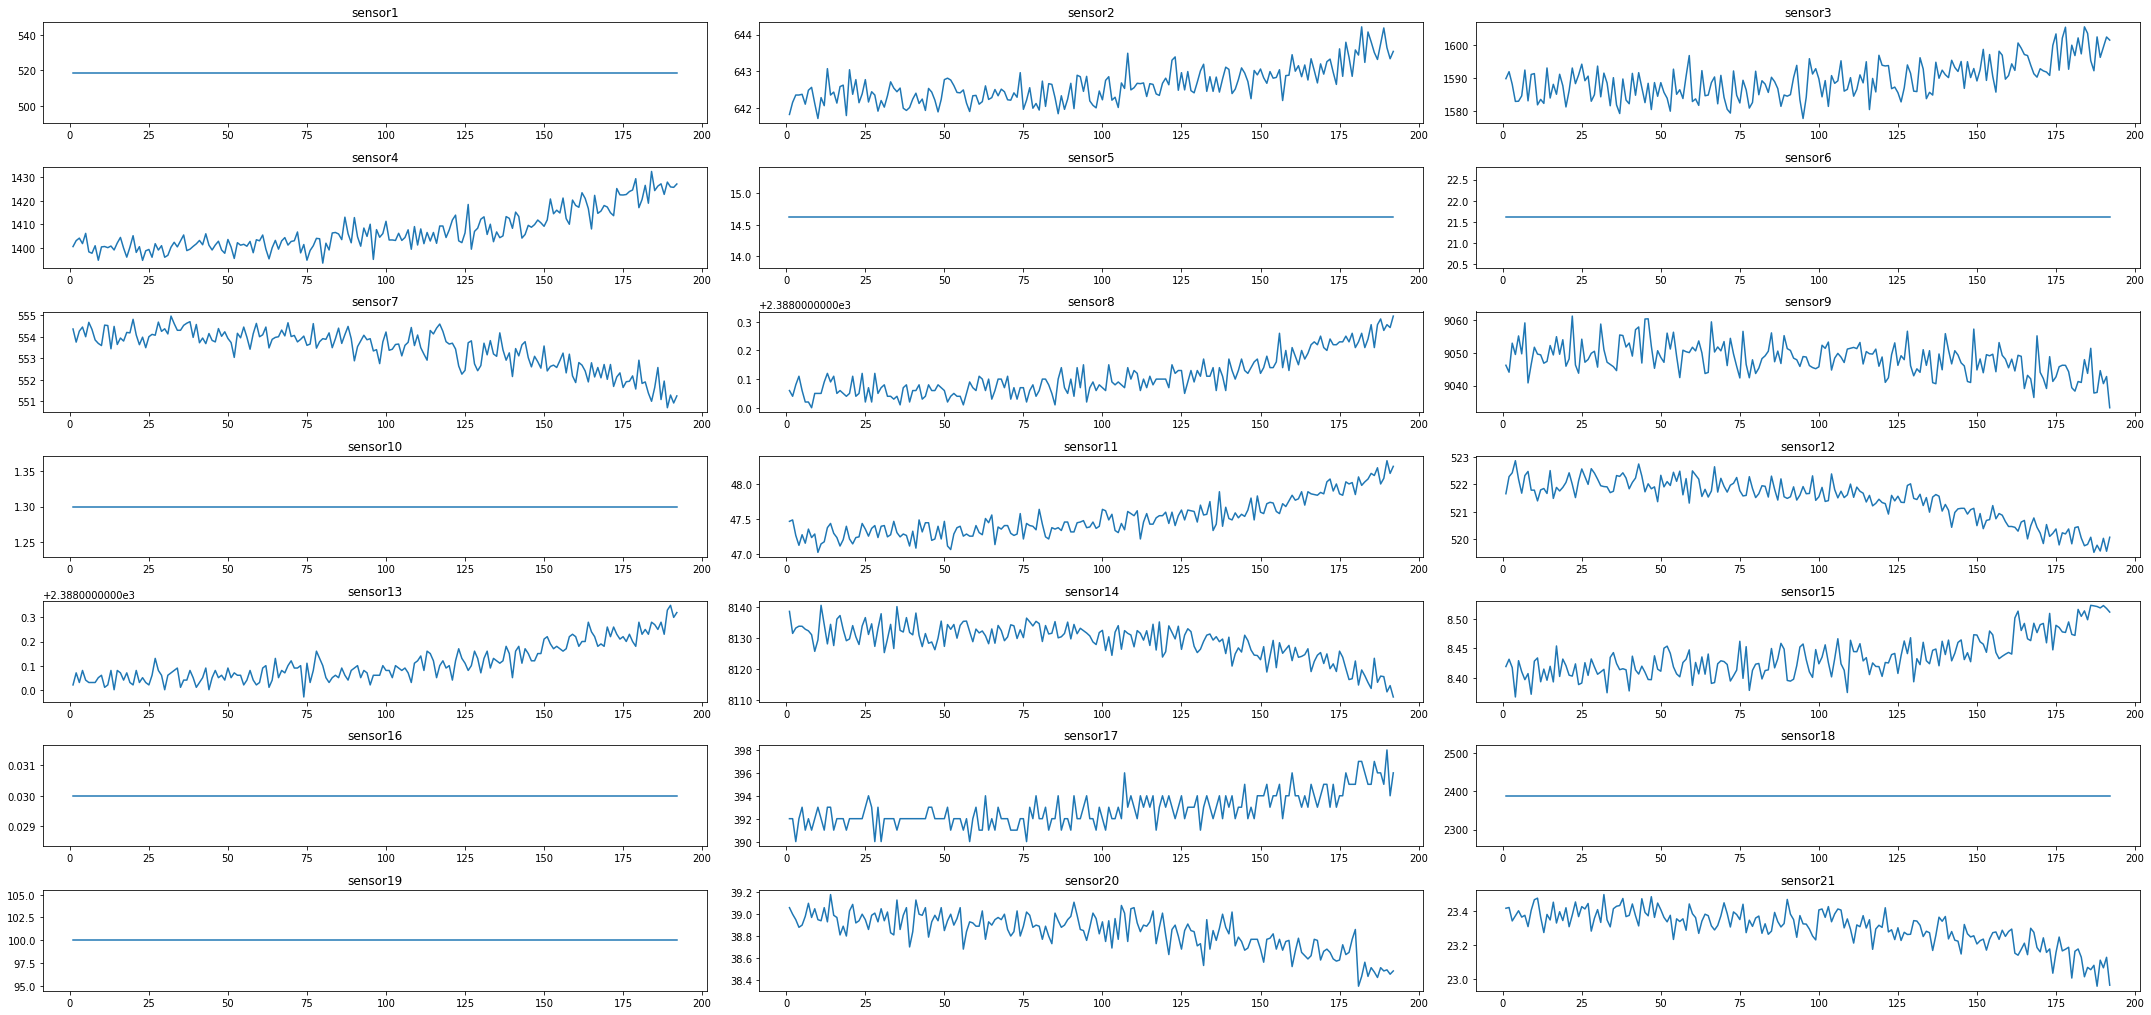

In [9]:
plotSensorDataOfId(train_df,1)

In [10]:
def plotDataDistribution(data):
    sensors = []
    plt.figure(figsize=(30, 10))
    for i,header in enumerate(data.columns[4:]):
        sensor = 'sensor'+str(i+1)
        if(len(data[header].unique())>1):
            sensors.append(sensor)
            plt.subplot(3, 10, i+1)
            sns.histplot(data[header])
    plt.tight_layout()
    # return sensors

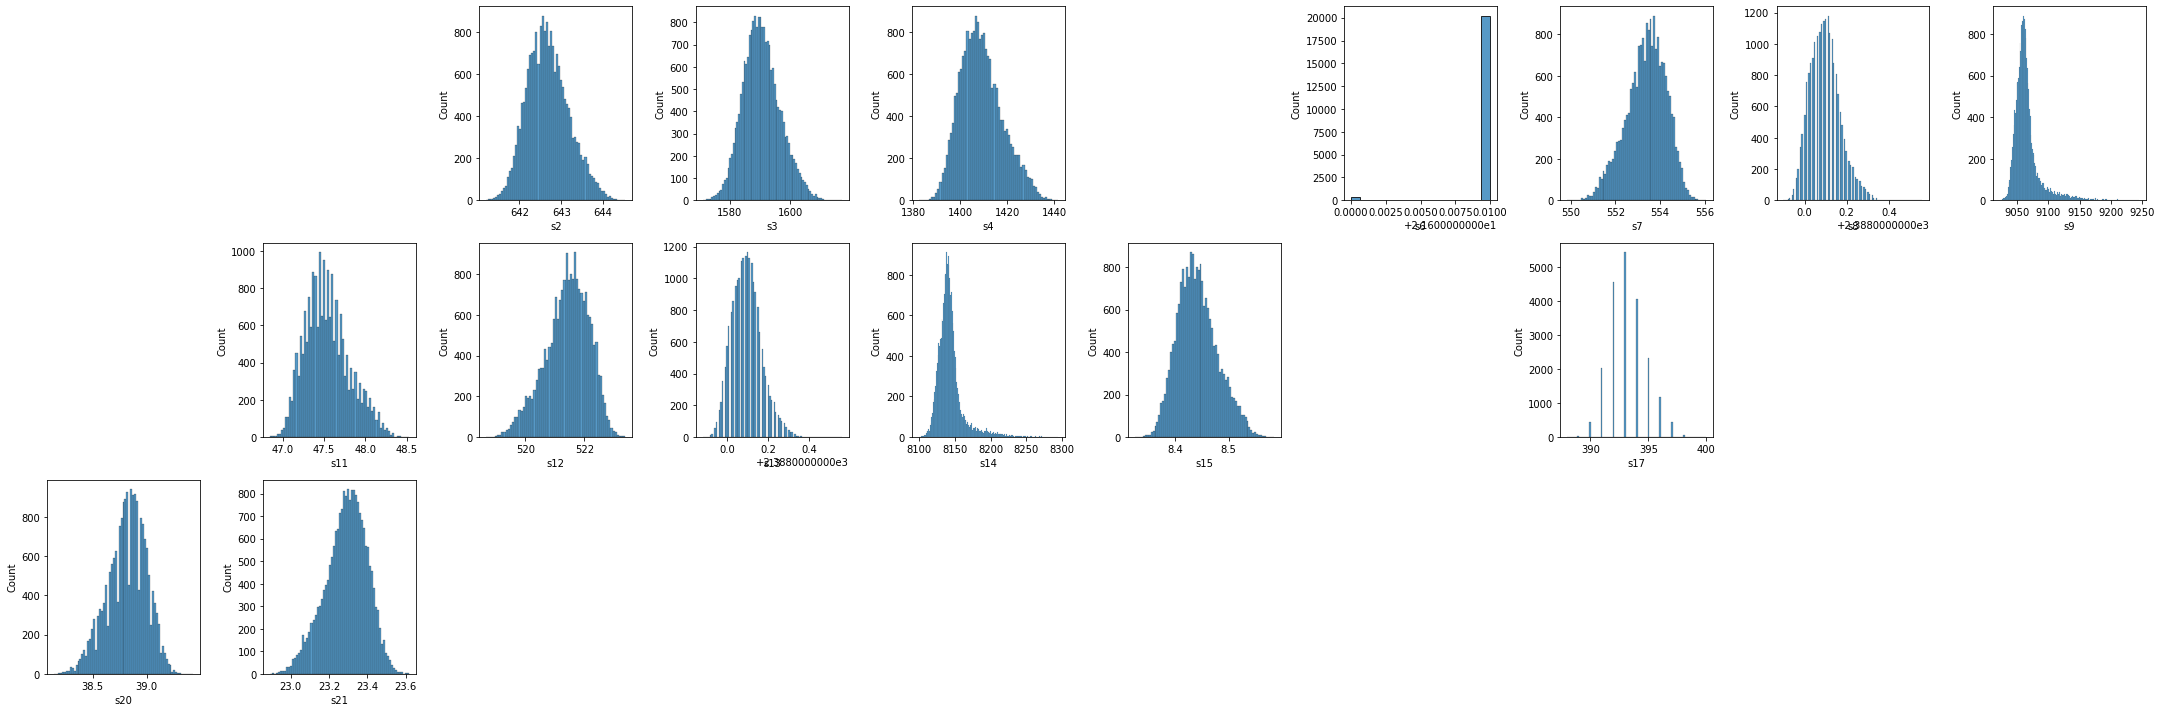

In [11]:
plotDataDistribution(train_df)